# Bank Marketing - Exploration des données

**Objectif** : Prédire si un client souscrira à un dépôt à terme suite à une campagne de télémarketing.

**Source** : UCI Bank Marketing Dataset (institution bancaire portugaise, 2008-2010)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

## 1. Chargement des données

In [2]:
# Le fichier utilise ';' comme séparateur
df = pd.read_csv('data/bank-full.csv', sep=';')
print(f"Dimensions : {df.shape[0]} lignes, {df.shape[1]} colonnes")

Dimensions : 45211 lignes, 17 colonnes


In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## 2. Aperçu des données

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
# Vérification des valeurs manquantes
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())

Valeurs manquantes par colonne :
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


## 3. Variable cible (y)

In [7]:
# Distribution de la variable cible
target_counts = df['y'].value_counts()
target_pct = df['y'].value_counts(normalize=True) * 100

print("Distribution de la variable cible :")
print(target_counts)
print(f"\nPourcentages : no={target_pct['no']:.1f}%, yes={target_pct['yes']:.1f}%")

Distribution de la variable cible :
y
no     39922
yes     5289
Name: count, dtype: int64

Pourcentages : no=88.3%, yes=11.7%


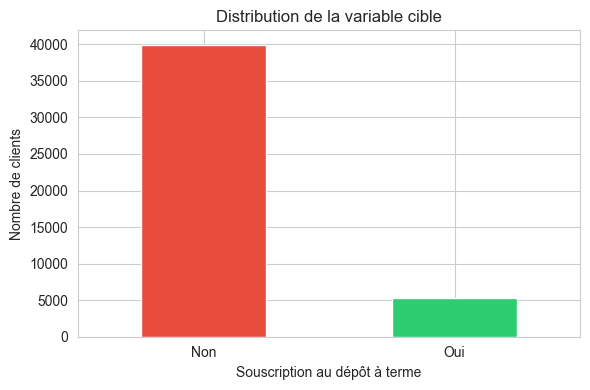

In [8]:
fig, ax = plt.subplots(figsize=(6, 4))
colors = ['#e74c3c', '#2ecc71']
df['y'].value_counts().plot(kind='bar', color=colors, ax=ax)
ax.set_title('Distribution de la variable cible')
ax.set_xlabel('Souscription au dépôt à terme')
ax.set_ylabel('Nombre de clients')
ax.set_xticklabels(['Non', 'Oui'], rotation=0)
plt.tight_layout()
plt.show()

## 4. Variables catégorielles

In [9]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
print(f"Variables catégorielles ({len(cat_cols)}) : {cat_cols}")

Variables catégorielles (10) : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [10]:
# Valeurs uniques par variable catégorielle
for col in cat_cols:
    print(f"\n{col} ({df[col].nunique()} valeurs) :")
    print(df[col].value_counts())


job (12 valeurs) :
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64



marital (3 valeurs) :
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

education (4 valeurs) :
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

default (2 valeurs) :
default
no     44396
yes      815
Name: count, dtype: int64

housing (2 valeurs) :
housing
yes    25130
no     20081
Name: count, dtype: int64

loan (2 valeurs) :
loan
no     37967
yes     7244
Name: count, dtype: int64

contact (3 valeurs) :
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

month (12 valeurs) :
month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

poutcome (4 valeurs) :
poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

y (2 valeurs) :
y
no     39922
yes     5289
Name: count, 

## 5. Variables numériques

In [11]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Variables numériques ({len(num_cols)}) : {num_cols}")

Variables numériques (7) : ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


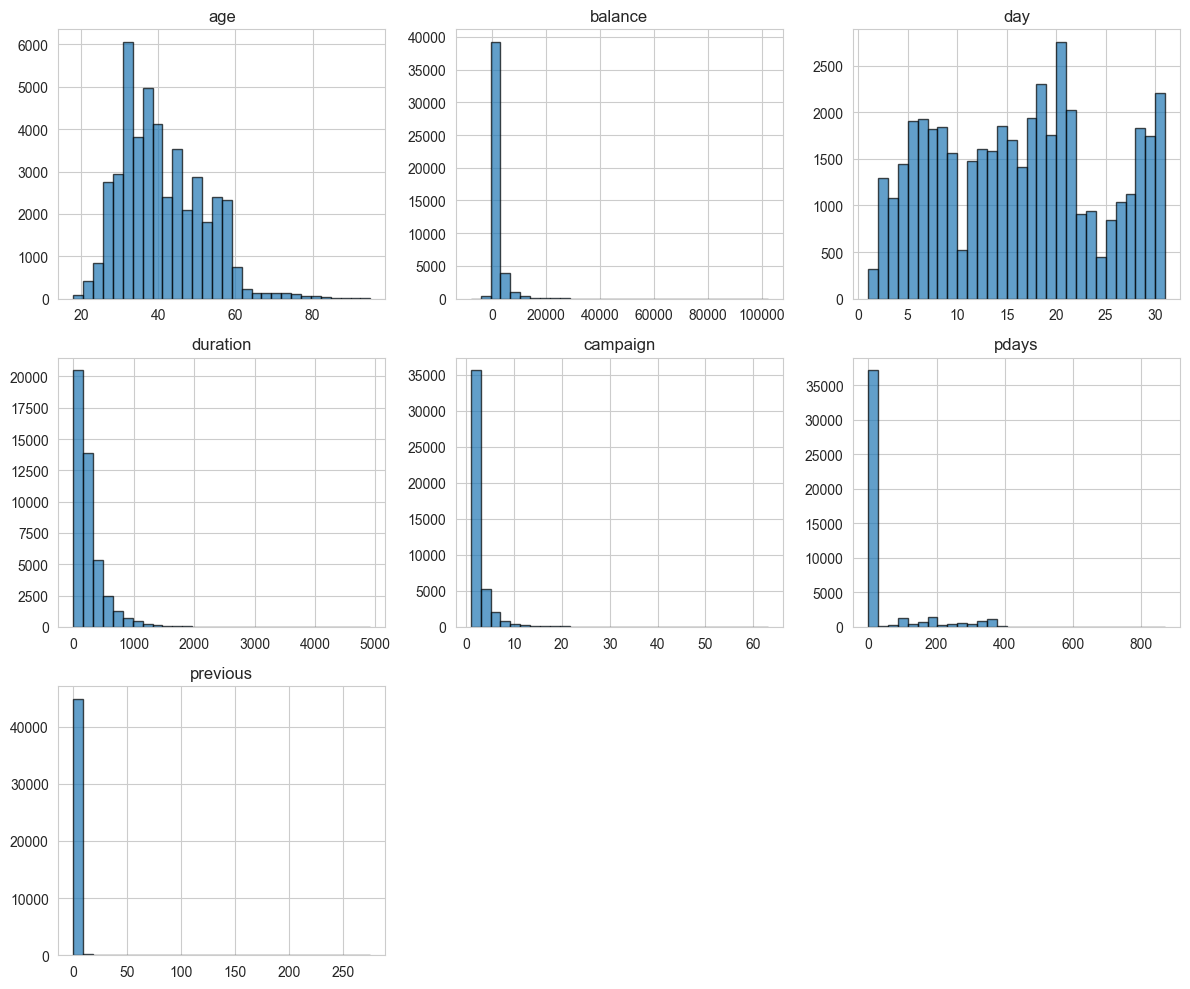

In [12]:
# Distribution des variables numériques
fig, axes = plt.subplots(3, 3, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    if i < len(axes):
        axes[i].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
        axes[i].set_title(col)
        axes[i].set_xlabel('')

# Masquer les axes inutilisés
for j in range(len(num_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

## 6. Relation entre features et variable cible

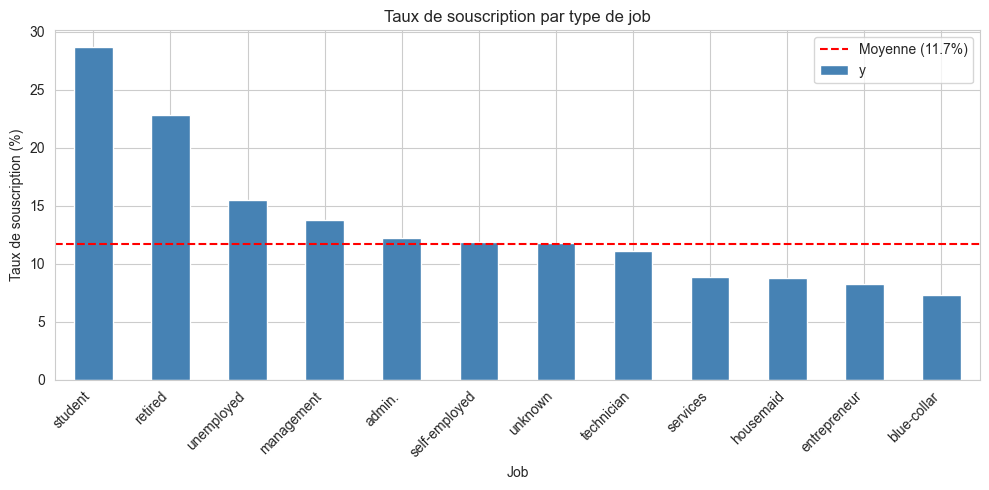

In [13]:
# Taux de souscription par catégorie de job
job_rates = df.groupby('job')['y'].apply(lambda x: (x == 'yes').mean() * 100).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 5))
job_rates.plot(kind='bar', ax=ax, color='steelblue')
ax.set_title('Taux de souscription par type de job')
ax.set_xlabel('Job')
ax.set_ylabel('Taux de souscription (%)')
ax.axhline(y=target_pct['yes'], color='red', linestyle='--', label=f'Moyenne ({target_pct["yes"]:.1f}%)')
ax.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

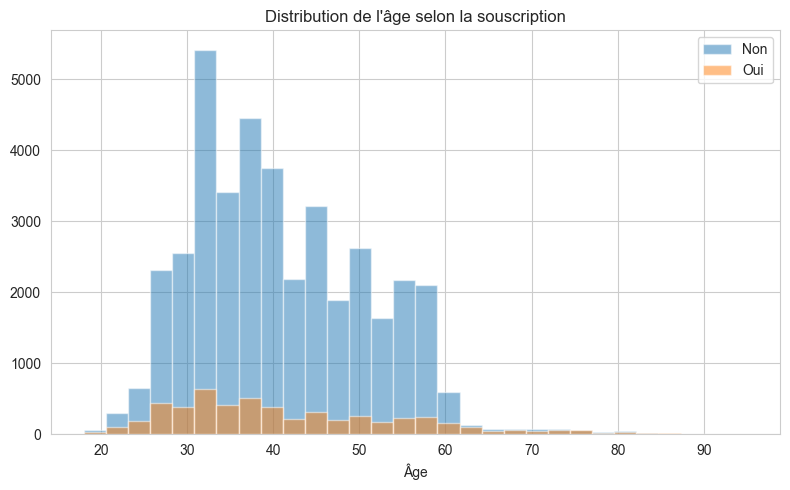

In [14]:
# Distribution de l'âge selon la souscription
fig, ax = plt.subplots(figsize=(8, 5))
df[df['y'] == 'no']['age'].hist(bins=30, alpha=0.5, label='Non', ax=ax)
df[df['y'] == 'yes']['age'].hist(bins=30, alpha=0.5, label='Oui', ax=ax)
ax.set_title("Distribution de l'âge selon la souscription")
ax.set_xlabel('Âge')
ax.legend()
plt.tight_layout()
plt.show()

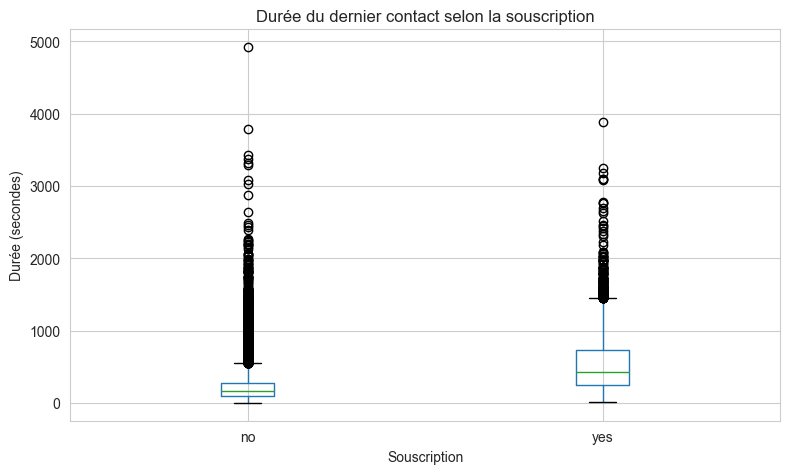

In [15]:
# Durée du dernier contact vs souscription
fig, ax = plt.subplots(figsize=(8, 5))
df.boxplot(column='duration', by='y', ax=ax)
ax.set_title('Durée du dernier contact selon la souscription')
ax.set_xlabel('Souscription')
ax.set_ylabel('Durée (secondes)')
plt.suptitle('')  # Supprimer le titre automatique
plt.tight_layout()
plt.show()

## 7. Observations préliminaires

**À compléter après exécution du notebook :**

- Classes déséquilibrées : ~88% no vs ~12% yes
- Variables catégorielles à encoder : job, marital, education, default, housing, loan, contact, month, poutcome
- Variable `duration` potentiellement très prédictive (mais attention : non disponible avant l'appel)
- Valeurs `unknown` présentes dans certaines colonnes catégorielles
- `pdays = -1` signifie que le client n'a pas été contacté lors de campagnes précédentes